# This analysis was intended to help me use my time and energy wisely during my job search

## The two main question I wanted to answer were as follows  
### 1) Which hard-skills were listed most frequently in the job-postings?
### 2) Which key words came up most frequently in the descriptions?

# These questions (and others) are answered below the Scraping and Prep sections 

## This data was sources from Flexjobs.com and is based on the search criteria 'Data Analyst' and 'Remote'

In [1]:
#Some basic libraries

import numpy as np
import pandas as pd
import gc
import math
import re
import datetime
from dateutil.parser import parse

#Web scraping imports 

import requests
from bs4 import BeautifulSoup as bs

# For Viz

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# WEB SCRAPING 

In [2]:
# # Load in the webpage 

# page = 1
# r = requests.get(f"https://www.flexjobs.com/search?location=Remote&page={page}&search=Data+Analyst ")

# # Convert to a Beautiful Soup Object 

# soup = bs(r.content)

# # Create Variable for just the body

# body = soup.body

#### Format is this one below where the 2 is , thats the page number 

https://www.flexjobs.com/search?location=Remote&page=2&search=Data+Analyst 

https://www.flexjobs.com/search?search=&search=Data+Analyst&location=remote

In [3]:
# testing = requests.get(f"https://www.flexjobs.com/search?location=Remote&page=1&search=Data+Analyst ")
# soup = bs(testing.content)
# body = soup.body
# job_box = body.find('li', class_ = 'list-group-item job')

# #print(job_box)

### Grabbing the right info and turing it into a DF

In [4]:
# def git_er_done (x,y):
    
#     total_dt = {}

#     for i in range(x,y):

#         flex_dt = {}
#         testing = requests.get(f"https://www.flexjobs.com/search?location=Remote&page={i}&search=Data+Analyst ")
#         soup = bs(testing.content)
#         body = soup.body
#         job_box = body.find_all('li', class_ = re.compile('^list-group-item job')) # change to find_all when ready 

#         for index, post in enumerate(job_box):

#             flex_dt[(i-1)*50+index] = [post.find('div', class_= "col-10 jt-title").text.replace('\n', '').rstrip(), 
#                             post.find('div', class_= "col-2 text-muted text-center").text.replace('\n', '').rstrip(), 
#                             post.find('span', class_= "text-danger").text.replace('\n', '').rstrip(), 
#                             post.find('div', class_= "row job-details").text.replace('\n', '').rstrip()]

#         total_dt.update(flex_dt)
        
#     df_flex = pd.DataFrame(total_dt).T
    
#     return df_flex

# #flex_run_6 = git_er_done(39,40) --- BLANKED OUT SO NO ACCIDNTAL RUNNING 

In [5]:
# YOU HAVE THESE NOW 

# flex_run_1 is page 1 and 2 
# flex_run_2 is page 3,4,5,6
# flex_run_3 is pages 7 - 16 should be 500 records 
# flex_run_4 is pages 17 - 26 should be 500 records 
# flex_run_5 is pages 27 - 38 should be 600 records
# flex_run_6 picks up the remaining 29 records 

### EXPORTING to excel 

In [6]:
#final2_flex_df = pd.concat([flex_run_1, flex_run_2, flex_run_3, flex_run_4, flex_run_5, flex_run_6], axis=0)

In [7]:
#final2_flex_df.columns = ('Job Title', 'Date Posted', 'Type', 'Quals')

In [8]:
#final2_flex_df.to_excel('flex_jobs_remote.xlsx')

# DATA PREP

In [9]:
# READ_IN the Excel DF 

final2_flex_df = pd.read_excel('flex_jobs_remote.xlsx')

In [10]:
final2_flex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1930 non-null   int64 
 1   Job Title    1930 non-null   object
 2   Date Posted  1930 non-null   object
 3   Type         1930 non-null   object
 4   Quals        1930 non-null   object
dtypes: int64(1), object(4)
memory usage: 75.5+ KB


In [11]:
final2_flex_df.shape

(1930, 5)

In [12]:
final2_flex_df.head()

,Unnamed: 0,Job Title,Date Posted,Type,Quals
0,0,Data Entry Analyst,Feb 26,Freelance Job,Data entry analyst needed for a contract posit...
1,1,Data Entry Analyst,Mar 06,"Full-Time, 100% Remote Job",Seeking a data entry analyst...
2,2,Data Analyst,Mar 03,"Part-Time, 100% Remote Job","Part-time, remote contract r..."
3,3,Data Analyst,Feb 09,100% Remote Job,Remote contract position for...
4,4,Data Analyst,Jan 20,"Full-Time, Option for Remote Job",Candidate will manage databa...


## Create a column for Month / Day 

In [13]:
# Parsing the date column so it is possibel to separate 
mon_day = [x.split() for x in final2_flex_df['Date Posted']]

# Extracting the months from that list 
month = [x[0] for x in mon_day]

# Extracting the Day from that list 
day = [x[1] for x in mon_day]

# Insert two columns into DF - 'Post Month' and 'Post Day' and drop 'Date Posted'
working_df = final2_flex_df.copy()

working_df['Post Month'] = month
working_df['Post Day'] = day

working2_df = working_df.drop(columns = ['Date Posted', 'Unnamed: 0'])

# Showing preview of updated DF
working2_df.head()

,Job Title,Type,Quals,Post Month,Post Day
0,Data Entry Analyst,Freelance Job,Data entry analyst needed for a contract posit...,Feb,26
1,Data Entry Analyst,"Full-Time, 100% Remote Job",Seeking a data entry analyst...,Mar,06
2,Data Analyst,"Part-Time, 100% Remote Job","Part-time, remote contract r...",Mar,03
3,Data Analyst,100% Remote Job,Remote contract position for...,Feb,09
4,Data Analyst,"Full-Time, Option for Remote Job",Candidate will manage databa...,Jan,20


## PICK IT APART

### Top Ten Job Titles listed in this search and how many times they appear 

In [14]:
# 'Data Entry Analyst'

data_analyst_jt = [x for x in working2_df['Job Title'] if x == 'Data Analyst']
count_data_anayst = len(data_analyst_jt)
#count_data_anayst

# Create a DF with the top 10 job titles and the amount of times they appear 
counts_jt = working2_df.groupby('Job Title').count().sort_values(by='Type', ascending=False).reset_index()[:10]
counts_jt['Count'] = counts_jt['Type']
job_title_count = counts_jt[['Job Title', 'Count']]

#job_title_count.to_excel('Job_title_flex.xlsx')

job_title_count

,Job Title,Count
0,Data Analyst,35
1,Business Analyst,35
2,Financial Analyst,28
3,Senior Financial Analyst,24
4,Data Scientist,19
5,Senior Data Engineer,13
6,Senior Data Analyst,13
7,Senior Business Analyst,13
8,In-field Quantitative Market Researcher,12
9,Marketing Analyst,9


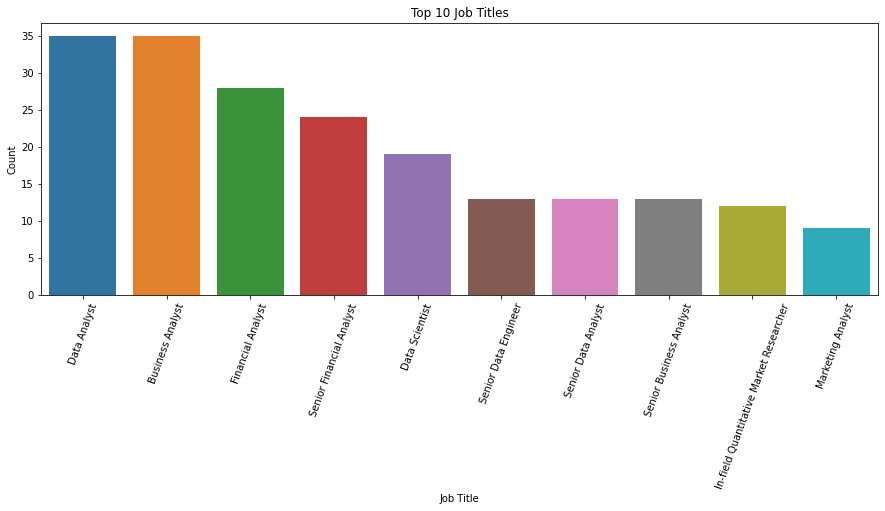

In [15]:
# Plotting 

fig = plt.figure(figsize = (15, 5))
 
job_title_bar = sns.barplot(x="Job Title", y="Count", data=job_title_count)
plt.xticks(rotation=70)
plt.title('Top 10 Job Titles')
plt.show()

### Top Ten Job Types listed in this search and how many times they appear 

In [16]:
# Create a DF with the top 10 job titles and the amount of times they appear 
counts_jty = working2_df.groupby('Type').count().sort_values(by='Quals', ascending=False).reset_index()[:10]
counts_jty['Count'] = counts_jty['Quals']
#job_title_count = counts_jt[['Type', 'Count']]

job_type_count = pd.DataFrame(counts_jty[['Type','Count']])
job_type_count
#job_type_count.to_excel('job_type_flex.xlsx')

,Type,Count
0,"Full-Time, 100% Remote Job",836
1,"Full-Time, Option for Remote Job",431
2,"Full-Time, Remote - During Pandemic Job",257
3,"Full-Time, Partial Remote Job",172
4,100% Remote Job,39
5,"Full-Time, Flexible Schedule Job",33
6,Freelance Job,27
7,"Part-Time, 100% Remote Job",25
8,Remote - During Pandemic Job,24
9,"Full-Time, Freelance Job",20


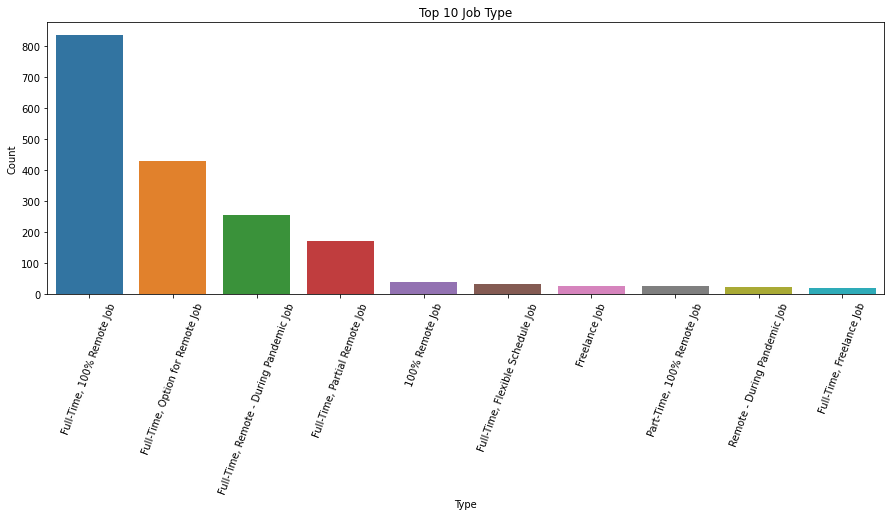

In [17]:
# Plotting 

fig = plt.figure(figsize = (15, 5))
 
job_type_bar = sns.barplot(x="Type", y="Count", data=job_type_count)
plt.xticks(rotation=70)
plt.title('Top 10 Job Type')
plt.show()

## Working on the Qualifications Category 

In [18]:
# Removing all special characters that are present in the DF
clean_quals_li = [re.sub("[,./']" ,' ',x).strip() for x in working2_df['Quals']]

### Cleaning list and removing filler-words to start removing words from the list 

In [19]:
# Removing double-spaces from DF
clean_quals_lis = [x.replace('  ', ' ') for x in clean_quals_li]
#clean_quals_lis[:5]

# Removing a when it is on its on
# clean_quals_list is a clean list 
clean_quals_list = [x.replace(' a ',' ') for x in clean_quals_lis]
#clean_quals_list[:5]

# Create a copy of list to work 
cql = clean_quals_list.copy()

# Removing a bunch of words that are not specific 
cql1 =  [x.replace('Data',' ').replace('data',' ').replace('entry',' ').replace('Entry',' ').replace(' for ',' ').replace(' and ', ' ')
        .replace(' be ', ' ').replace(' able ', ' ').replace(' to ', ' ').replace(' with ', ' ').replace(' or ', ' ').replace(' is ', ' ')
        .replace('  ',' ').replace('   ', ' ').strip() for x in cql]
        
# cql1 is list with about half words gone KEEP IT HERE AND start stripping with a second list 
cql2 = [x.replace('He ', '').replace('She ', '').replace(' will ', ' ').replace(' Will ', ' ')
        .replace('in ', ' ').replace(' the ', ' ').replace(' s ', ' ').replace('  ', ' ') for x in cql1]

### Getting counts of specific words in each description 

In [20]:
# Make cipy of DF for this 
working3_df = working2_df.copy()

In [21]:
# Getting a list of indexes where sql is in the description 
sql_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(sql|SQL)', i):
        sql_list.append(index)

sql_list

[6,
 11,
 14,
 27,
 31,
 39,
 46,
 49,
 55,
 56,
 62,
 68,
 71,
 80,
 90,
 91,
 95,
 99,
 117,
 126,
 137,
 139,
 151,
 152,
 176,
 181,
 221,
 246,
 254,
 287,
 310,
 320,
 351,
 357,
 366,
 376,
 415,
 437,
 445,
 461,
 466,
 470,
 489,
 490,
 501,
 513,
 529,
 537,
 572,
 574,
 599,
 724,
 741,
 745,
 772,
 808,
 811,
 887,
 931,
 966,
 984,
 997,
 1060,
 1086,
 1094,
 1121,
 1129,
 1147,
 1165,
 1171,
 1176,
 1177,
 1222,
 1223,
 1229,
 1306,
 1345,
 1483,
 1486,
 1508,
 1545,
 1566,
 1575,
 1578,
 1686,
 1696,
 1700,
 1764,
 1835]

In [22]:
# Getting a list of indexes where python is in the description 
python_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(python|Python)', i):
        python_list.append(index)

python_list

[11,
 27,
 46,
 71,
 76,
 91,
 131,
 139,
 171,
 174,
 254,
 306,
 382,
 421,
 490,
 572,
 808,
 814,
 868,
 997,
 1086,
 1090,
 1121,
 1388,
 1483,
 1503,
 1545,
 1653,
 1725,
 1753,
 1754,
 1894]

In [23]:
# Getting a list of indexes where Excel is in the description 
excel_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(excel|Excel|xcl|xcel)', i):
        excel_list.append(index)

excel_list

[0,
 6,
 14,
 19,
 27,
 39,
 40,
 52,
 53,
 154,
 203,
 248,
 265,
 267,
 273,
 283,
 292,
 338,
 346,
 361,
 409,
 416,
 449,
 451,
 466,
 476,
 495,
 509,
 513,
 537,
 555,
 585,
 599,
 630,
 701,
 702,
 739,
 803,
 826,
 856,
 906,
 1057,
 1130,
 1171,
 1182,
 1184,
 1190,
 1219,
 1222,
 1229,
 1263,
 1350,
 1408,
 1425,
 1506,
 1543,
 1584,
 1605,
 1684,
 1786,
 1788,
 1885]

In [24]:
# Getting a list of indexes where Tableau is in the description 
tab_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(tableau|Tableau)', i):
        tab_list.append(index)

tab_list

[40, 51, 62, 382, 445, 572, 581, 739, 803, 1087, 1171, 1176, 1310, 1457, 1566]

In [25]:
# Getting a list of indexes where Power BI is in the description 
pbi_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(power bi|Power bi|power BI|Power BI|POWER BI)', i):
        pbi_list.append(index)

pbi_list

[59, 532, 664]

In [26]:
# Getting a list of indexes where Dashboard is in the description 
dashboard_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(dashboard|Dashboard|dashboards|Dashboards)', i):
       dashboard_list.append(index)

dashboard_list

[3,
 9,
 11,
 14,
 17,
 20,
 27,
 37,
 38,
 42,
 45,
 57,
 81,
 84,
 85,
 95,
 97,
 122,
 134,
 136,
 150,
 176,
 186,
 220,
 238,
 239,
 299,
 304,
 316,
 321,
 331,
 399,
 423,
 436,
 459,
 465,
 472,
 598,
 599,
 602,
 634,
 637,
 660,
 663,
 705,
 731,
 737,
 739,
 741,
 759,
 809,
 840,
 841,
 850,
 910,
 972,
 976,
 994,
 1010,
 1049,
 1067,
 1092,
 1093,
 1100,
 1129,
 1132,
 1146,
 1150,
 1163,
 1165,
 1166,
 1167,
 1199,
 1203,
 1211,
 1298,
 1808]

In [27]:
# Getting a list of indexes where collaborate is in the description 
collaborate_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(collaborate|Collaborate)', i):
       collaborate_list.append(index)

collaborate_list

[3,
 5,
 6,
 18,
 21,
 32,
 59,
 67,
 74,
 93,
 135,
 158,
 162,
 171,
 176,
 287,
 298,
 310,
 316,
 320,
 321,
 327,
 331,
 334,
 352,
 363,
 388,
 410,
 467,
 516,
 524,
 541,
 543,
 546,
 573,
 574,
 581,
 619,
 633,
 655,
 710,
 715,
 731,
 746,
 757,
 791,
 824,
 833,
 851,
 857,
 863,
 865,
 881,
 888,
 920,
 936,
 945,
 956,
 985,
 1027,
 1039,
 1060,
 1076,
 1085,
 1086,
 1091,
 1101,
 1123,
 1136,
 1161,
 1174,
 1235,
 1269,
 1291,
 1322,
 1332,
 1340,
 1344,
 1354,
 1399,
 1400,
 1404,
 1423,
 1447,
 1465,
 1495,
 1496,
 1498,
 1502,
 1510,
 1511,
 1516,
 1529,
 1530,
 1556,
 1559,
 1562,
 1596,
 1611,
 1638,
 1642,
 1644,
 1645,
 1650,
 1692,
 1696,
 1702,
 1728,
 1731,
 1739,
 1746,
 1751,
 1758,
 1762,
 1768,
 1770,
 1792,
 1793,
 1795,
 1803,
 1818,
 1820,
 1824,
 1853,
 1855,
 1860,
 1861,
 1863,
 1876,
 1888,
 1908,
 1913,
 1914]

In [28]:
# Getting a list of indexes where interpret is in the description 
interpret_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(interpret|Interpret|interprets|Interprets)', i):
       interpret_list.append(index)

interpret_list

[4,
 7,
 10,
 12,
 22,
 147,
 161,
 181,
 212,
 252,
 265,
 323,
 527,
 595,
 601,
 662,
 735,
 752,
 782,
 795,
 797,
 799,
 801,
 815,
 823,
 912,
 1122,
 1134,
 1227,
 1288,
 1351,
 1378]

In [29]:
# Getting a list of indexes where integrate is in the description 
integrate_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(integrate|Integrate|integrates|Integrates)', i):
       integrate_list.append(index)

integrate_list

[69, 103, 228, 481, 692, 1019, 1367, 1498, 1512, 1564, 1655, 1718, 1812]

In [30]:
# Getting a list of indexes where translate is in the description 
translate_list = []

for index, i in enumerate(working3_df['Quals']):

    if re.findall('(translate|translates|Translate|Translates)', i):
       translate_list.append(index)

translate_list

[20,
 69,
 75,
 86,
 112,
 166,
 293,
 345,
 570,
 634,
 671,
 810,
 866,
 901,
 1036,
 1077,
 1088,
 1126,
 1129,
 1162,
 1227,
 1254,
 1325,
 1341,
 1404,
 1458,
 1546,
 1588,
 1589,
 1636,
 1731,
 1768,
 1789,
 1804,
 1814,
 1824,
 1835,
 1857,
 1927]

### Create dfS to create visual for word count

In [31]:
# Hard Skills for entire List of Jobs 

hard_skills_columns = ['SQL', 'Python', "Excel", "Tableau", "Power BI", "Dashboards"]
hard_skills_count = [len(sql_list),len(python_list),len(excel_list),len(tab_list),len(pbi_list),len(dashboard_list)]
hard_skills_dict = {'Key Word': hard_skills_columns, 'Count': hard_skills_count}


hard_skills_df = pd.DataFrame(hard_skills_dict).sort_values(by='Count', ascending = False) 
hard_skills_df

,Key Word,Count
0,SQL,89
5,Dashboards,77
2,Excel,62
1,Python,32
3,Tableau,15
4,Power BI,3


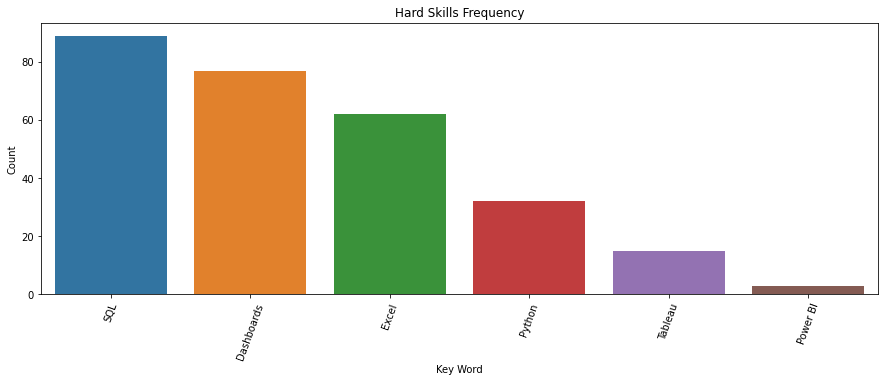

In [32]:
# Plotting 

fig = plt.figure(figsize = (15, 5))
 
job_skill_bar = sns.barplot(x="Key Word", y="Count", data= hard_skills_df)
plt.xticks(rotation=70)
plt.title('Hard Skills Frequency')
plt.show()

In [33]:
# Soft Skills for entire list 

soft_skills_columns = ['Collaborate', 'Interpret', "Integrate", "Translate"]
soft_skills_count = [len(collaborate_list),len(interpret_list),len(integrate_list),len(translate_list)]
soft_skills_dict = {'Key Word': soft_skills_columns, 'Count': soft_skills_count}


soft_skills_df = pd.DataFrame(soft_skills_dict) 
soft_skills_df

,Key Word,Count
0,Collaborate,133
1,Interpret,32
2,Integrate,13
3,Translate,39


### TURNING THE QUALS CATEGORY INTO ONE GIANT STRING and COUNT OCCURANCES 

In [34]:
def concat_list(list):
    big_string = ''
    for ele in list:
        big_string += str(ele + ' ')
    return big_string

con_string = concat_list(clean_quals_li)

con_string_ready = con_string.replace('  ', ' ')
#con_string_ready

In [35]:
def word_co(x):
    con = dict()
    wor = x.split()

    for i in wor:
        if i in con:
            con[i] += 1
        else:
            con[i] = 1

    return con

#Its a dictionary now 
keys_words_dict = word_co(con_string_ready)

### Turning it all into a df

In [36]:
keys_words_df = pd.DataFrame([k + ' ' + str(v) for k, v in keys_words_dict.items()], columns=['Count'])
#print(keys_words_df)

kw_list = []
kcount = []

for i in keys_words_df['Count']:
    w,c = i.split()
    kw_list.append(w)
    kcount.append(c)

In [37]:
# Dealing with DATA TYPES 

kw_count_df = pd.DataFrame(kw_list, columns = ['Key_Word'])
kw_count_df['Count'] = kcount

# Changing Count from Object to int8
copy_kw_df = kw_count_df.copy()
copy_kw_df["Count"] = pd.to_numeric(copy_kw_df["Count"])
copy_kw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Key_Word  4244 non-null   object
 1   Count     4244 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.4+ KB


In [38]:
ordered_kw_df = copy_kw_df.sort_values(by = 'Count', ascending=False)

### Grabbing the words that PROVIDE INSIGHT 

In [39]:
# This required me to look through the list and manually pick which words were valuable. 

In [40]:
top10_insight_wordsDF = ordered_kw_df[ordered_kw_df.Key_Word.isin(["experience","exp","degree","develop", "provide", "team", "analyze", "create", "identify", "research", "manage", "build", "reports", "reporting", "opportunity", "solutions"])]

top10_insight_wordsDF

,Key_Word,Count
56,experience,1345
113,degree,655
61,develop,348
78,exp,320
73,provide,267
122,team,267
108,analyze,242
95,create,204
50,identify,183
249,research,183


In [ ]:
# Plotting 

fig = plt.figure(figsize = (15, 5))
 
job_KW_bar = sns.barplot(x="Key_Word", y="Count", data= top10_insight_wordsDF)
plt.xticks(rotation=70, size='16')
plt.title('Key_word Frequency')
plt.show()

In [ ]:
# Making a copy to work 
word_count_working = kw_count_df.copy()

In [ ]:
#word_count_working.to_excel('we_ce.xlsx')

# THIS SECTION IS ALL ABOUT CHECKING WHAT tense (present | future) THE POSTINGS WERE WRITTEN IN  

In [ ]:
# Creating copy for next section 

working3_df.head()

In [42]:
# is & will list 

iswill_list = []

for index, i in enumerate(working3_df['Quals']):
    if re.findall('(will|Will|WILL)', i):
        if re.findall('(is|Is|IS)', i):
            iswill_list.append(index)

len(iswill_list)

621

In [43]:
# Will no IS list 

onlywill_list = []


for index, i in enumerate(working3_df['Quals']):
    if re.findall('(is|Is|IS)', i):
        continue
    if re.findall('(will|Will|WILL)', i):
        onlywill_list.append(index)

len(onlywill_list)

413

In [44]:
# Is no Will list 

onlyis_list = []


for index, i in enumerate(working3_df['Quals']):
    if re.findall('(will|Will|WILL)', i):
        continue
    if re.findall('(is|Is|IS)', i): 
        onlyis_list.append(index)

len(onlyis_list)

556

In [45]:
# Neither list  

neither_list = []


for index, i in enumerate(working3_df['Quals']):
    if re.findall('(will|Will|WILL)', i):
        continue
    if re.findall('(is|Is|IS)', i): 
        continue
    neither_list.append(index)

len(neither_list)

340

### BREAKING DOWN da, ba, fa 

#### DATA ANALYST 

In [46]:
# Making Copy for this 
working4_df = working2_df.copy()

# Creating DF for Data Analyst jobs only 
only_data_analyst = working4_df[working4_df['Job Title'].isin(['Data Analyst'])]

only_data_analyst_copy = only_data_analyst.copy()

da_type_count_df = only_data_analyst_copy.groupby(['Type', 'Job Title']).count().reset_index()

da_type_count_df['Count'] = da_type_count_df['Quals']

da_type_count_df[['Type','Job Title', 'Count']].sort_values(by = 'Count', ascending= False)

,Type,Job Title,Count
1,"Full-Time, 100% Remote Job",Data Analyst,10
4,"Full-Time, Option for Remote Job",Data Analyst,10
6,"Full-Time, Remote - During Pandemic Job",Data Analyst,7
0,100% Remote Job,Data Analyst,2
8,"Part-Time, 100% Remote Job",Data Analyst,2
2,"Full-Time, Flexible Schedule Job",Data Analyst,1
3,"Full-Time, Freelance Job",Data Analyst,1
5,"Full-Time, Partial Remote Job",Data Analyst,1
7,"Full-Time, Temporary Job",Data Analyst,1


In [48]:
# Making a copy for work 
only_da = only_data_analyst.copy()

# Making og index its own column so it doesnt get lost 
only_da['og_index'] = only_da.index

da_will_only = []
da_is_only = []
da_both = []
da_neither = []

for i in only_da['og_index']:
    if i in onlywill_list:
        da_will_only.append(i)
    elif i in onlyis_list:
        da_is_only.append(i)
    elif i in iswill_list:
        da_both.append(i)
    else:
        da_neither.append(i)
    

print(len(da_will_only),len(da_is_only),len(da_both),len(da_neither))

10 9 13 3


#### BUSINESS ANALYST

In [47]:
# Creating DF for Business Analyst jobs only 
only_biz_analyst = working4_df[working4_df['Job Title'].isin(['Business Analyst'])]

only_biz_analyst

only_biz_analyst_copy = only_biz_analyst.copy()

biz_type_count_df = only_biz_analyst_copy.groupby(['Type', 'Job Title']).count().reset_index()

biz_type_count_df['Count'] = biz_type_count_df['Quals']

biz_type_count_df[['Type','Job Title', 'Count']].sort_values(by = 'Count', ascending= False)

,Type,Job Title,Count
2,"Full-Time, 100% Remote Job",Business Analyst,12
5,"Full-Time, Option for Remote Job",Business Analyst,8
7,"Full-Time, Remote - During Pandemic Job",Business Analyst,6
1,Remote - During Pandemic Job,Business Analyst,2
6,"Full-Time, Partial Remote Job",Business Analyst,2
0,100% Remote Job,Business Analyst,1
3,"Full-Time, Flexible Schedule Job",Business Analyst,1
4,"Full-Time, Freelance Job",Business Analyst,1
8,"Full-Time, Temporary Job",Business Analyst,1
9,"Part-Time, 100% Remote Job",Business Analyst,1


In [49]:
# Making a copy for work 
only_biz = only_biz_analyst.copy()

# Making og index its own column so it doesnt get lost 
only_biz['og_index'] = only_biz.index

biz_will_only = []
biz_is_only = []
biz_both = []
biz_neither = []

for i in only_biz['og_index']:
    if i in onlywill_list:
        biz_will_only.append(i)
    elif i in onlyis_list:
        biz_is_only.append(i)
    elif i in iswill_list:
        biz_both.append(i)
    else:
        biz_neither.append(i)
    

print(len(biz_will_only),len(biz_is_only),len(biz_both),len(biz_neither))

8 12 10 5


### FINANCIAL ANALYST

In [50]:
# Creating DF for Financial Analyst jobs only 
only_fin_analyst = working4_df[working4_df['Job Title'].isin(['Financial Analyst'])]

only_fin_analyst

only_fin_analyst_copy = only_fin_analyst.copy()

fin_type_count_df = only_fin_analyst_copy.groupby(['Type', 'Job Title']).count().reset_index()

fin_type_count_df['Count'] = fin_type_count_df['Quals']

fin_type_count_df[['Type','Job Title', 'Count']].sort_values(by = 'Count', ascending= False)

,Type,Job Title,Count
2,"Full-Time, 100% Remote Job",Financial Analyst,12
6,"Full-Time, Remote - During Pandemic Job",Financial Analyst,5
4,"Full-Time, Option for Remote Job",Financial Analyst,4
0,100% Remote Job,Financial Analyst,2
1,Freelance Job,Financial Analyst,2
3,"Full-Time, Freelance Job",Financial Analyst,1
5,"Full-Time, Partial Remote Job",Financial Analyst,1
7,"Part-Time, Option for Remote Job",Financial Analyst,1


In [51]:
# Making a copy for work 
only_fin = only_fin_analyst.copy()

# Making og index its own column so it doesnt get lost 
only_fin['og_index'] = only_fin.index

fin_will_only = []
fin_is_only = []
fin_both = []
fin_neither = []

for i in only_fin['og_index']:
    if i in onlywill_list:
        fin_will_only.append(i)
    elif i in onlyis_list:
        fin_is_only.append(i)
    elif i in iswill_list:
        fin_both.append(i)
    else:
        fin_neither.append(i)
    

print(len(fin_will_only),len(fin_is_only),len(fin_both),len(fin_neither))

6 10 10 2


In [ ]:
# def concatenate_list_data(list):
#     rex = ''
#     for ele in list:
#         rex += str(ele + ' ')
#     return rex

# print(concatenate_list_data(asa))